In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv('hou_all.csv')

In [6]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
crim           506 non-null float64
zn             506 non-null float64
indus          506 non-null float64
chas           506 non-null int64
nox            506 non-null float64
rm             506 non-null float64
age            506 non-null float64
dis            506 non-null float64
rad            506 non-null int64
tax            506 non-null int64
ptratio        506 non-null float64
black          506 non-null float64
lstat          506 non-null float64
medv           506 non-null float64
Unnamed: 14    506 non-null int64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [8]:
data.isna().sum()

crim           0
zn             0
indus          0
chas           0
nox            0
rm             0
age            0
dis            0
rad            0
tax            0
ptratio        0
black          0
lstat          0
medv           0
Unnamed: 14    0
dtype: int64

Last Column ```Unnamned: 14``` doesn't have and significance so remove it

In [9]:
data = data.drop('Unnamed: 14',axis=1)

In [10]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Generally, NaN or missing values can be in any form like 0, ? or may be written as “missing” and in our case, we can see that there are a lot of 0’s, so we can replace them with NaN to calculate how much data we are missing.

In [11]:
data.zn.replace(0,np.nan,inplace = True)
data.chas.replace(0,np.nan,inplace=True)

In [12]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,NaN,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,NaN,7.07,NaN,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,NaN,7.07,NaN,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,NaN,2.18,NaN,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,NaN,2.18,NaN,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         134 non-null float64
indus      506 non-null float64
chas       35 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [14]:
#Percent of data which is not available
data.isnull().sum()/len(data) * 100

crim        0.000000
zn         73.517787
indus       0.000000
chas       93.083004
nox         0.000000
rm          0.000000
age         0.000000
dis         0.000000
rad         0.000000
tax         0.000000
ptratio     0.000000
black       0.000000
lstat       0.000000
medv        0.000000
dtype: float64

both “ZN” and “CHAS” are missing more than 70% data, so will remove both these features

In [15]:
data = data.drop(['zn','chas'],axis=1)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
crim       506 non-null float64
indus      506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(10), int64(2)
memory usage: 47.5 KB


In [17]:
data.describe()

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Separating the dependent and independent variables**

[]

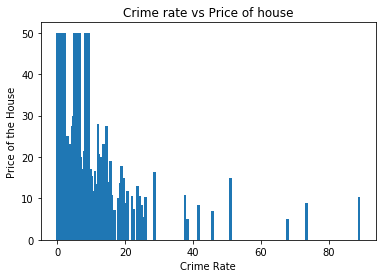

In [18]:
plt.bar(data.crim,data.medv)
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.title('Crime rate vs Price of house')
plt.plot()

**As Crime rate increases the rate of House decreases**

[]

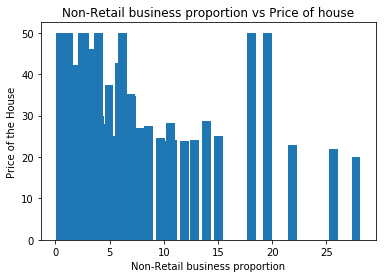

In [19]:
plt.bar(data.indus,data.medv)
plt.xlabel('Non-Retail business proportion')
plt.ylabel('Price of the House')
plt.title('Non-Retail business proportion vs Price of house')
plt.plot()

[]

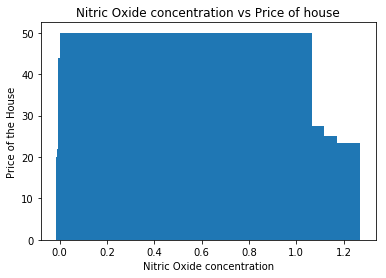

In [20]:
plt.bar(data.nox,data.medv)
plt.xlabel('Nitric Oxide concentration')
plt.ylabel('Price of the House')
plt.title('Nitric Oxide concentration vs Price of house')
plt.plot()

**As Nitric Oxide concentration increases the rate of House decreases**

[]

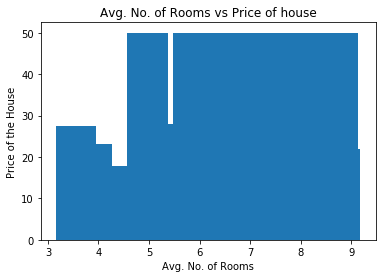

In [21]:
plt.bar(data.rm,data.medv)
plt.xlabel('Avg. No. of Rooms')
plt.ylabel('Price of the House')
plt.title('Avg. No. of Rooms vs Price of house')
plt.plot()

**As no. of rooms increases price of house increases**

[]

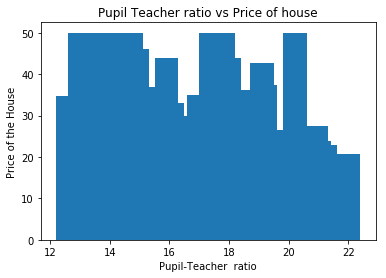

In [22]:
plt.bar(data.ptratio,data.medv)
plt.xlabel('Pupil-Teacher  ratio')
plt.ylabel('Price of the House')
plt.title('Pupil Teacher ratio vs Price of house')
plt.plot()

[]

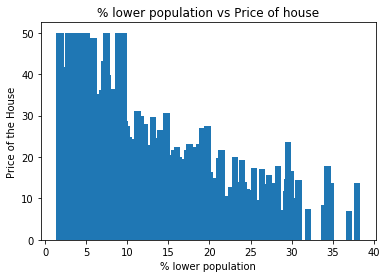

In [23]:
plt.bar(data.lstat,data.medv)
plt.xlabel('% lower population')
plt.ylabel('Price of the House')
plt.title('% lower population vs Price of house')
plt.plot()

**Where the lower status population is low price of houses are high**

In [24]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) # Fitting our model to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
y_pred = model.predict(X_test)

**Print the coefficent of the Model**

In [28]:
# The coefficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-1.19332593e-01  1.20970593e-02 -1.73005334e+01  4.12170424e+00
 -1.37417904e-02 -1.25055232e+00  2.44921612e-01 -9.67542136e-03
 -1.18932063e+00  7.56361429e-03 -4.79845036e-01]


Text(0,0.5,'Predicted Y')

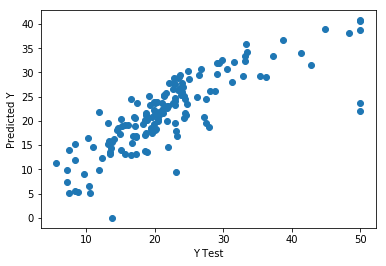

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [30]:
from sklearn import metrics 
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test)) // 

MAE 3.7125347264819153
MSE 28.477481110580698
RMSE 5.336429622002027
Score: 0.6579918387799596


In [31]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.6579918387799596